<a href="https://colab.research.google.com/github/Utsuk7/Weapon-Detection-System-using-Deep-Learning-/blob/main/Weapon_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
Y
  Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip install tensorflow

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [1]:
!kaggle datasets download -d snehilsanyal/weapon-detection-test

Dataset URL: https://www.kaggle.com/datasets/snehilsanyal/weapon-detection-test
License(s): CC0-1.0
 99% 193M/194M [00:05<00:00, 46.8MB/s]
100% 194M/194M [00:05<00:00, 40.4MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/weapon-detection-test.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
label=os.listdir('/content/weapon_detection/train/labels')

In [ ]:
len(label)

571

In [ ]:
label=np.sort(label)

In [ ]:
def extract_label(s):
  s=s.split(".")[0]
  s=s.split("_")[0]
  return s

In [ ]:
extract_label('Handgun_89.txt')

'Handgun'

In [ ]:
labels=[extract_label(i) for i in label]

In [ ]:
le=LabelEncoder()
int_labels=le.fit_transform(labels)
print(int_labels.shape)

(571,)


In [ ]:
ohe_labels=to_categorical(int_labels,num_classes=9)
print(ohe_labels.shape)

(571, 9)


In [ ]:
print(ohe_labels[200])

[0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
np.array(ohe_labels[400])

array([0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
'''dicti={}
for i in range(len(set(labels))):
  dicti[list(set(labels))[i]]=i
'''

'dicti={}\nfor i in range(len(set(labels))):\n  dicti[list(set(labels))[i]]=i\n'

In [ ]:
dicti={'Automatic Rifle':0,
 'Bazooka':1,
 'Grenade Launcher':2,
 'Handgun':3,
 'Knife':4,
 'SMG':5,
 'Shotgun':6,
 'Sniper':7,
 'Sword':8}

In [ ]:
#ohe of label data
'''labels=[]
for i in os.listdir('/content/weapon_detection/train/images'):
  l=extract_label(i)
  label=[0]*9
  label[dicti[l]]=1
  labels.append(label)'''

"labels=[]\nfor i in os.listdir('/content/weapon_detection/train/images'):\n  l=extract_label(i)\n  label=[0]*9\n  label[dicti[l]]=1\n  labels.append(label)"

In [ ]:
#labels=np.array(labels)

In [ ]:
import numpy as np
import cv2
from PIL import Image
#np.array(labels).shape

In [ ]:
#finding minimum height and width of image
width=10000
height=10000
for i in os.listdir('/content/weapon_detection/train/images'):
  img=Image.open('/content/weapon_detection/train/images/'+i)

  w=img.width
  h=img.height

  if w<width:
    width=w
  if h<height:
    height=h
print(width,height)

220 140


In [ ]:
images=[]
for i in os.listdir('/content/weapon_detection/train/images'):
  img=cv2.imread('/content/weapon_detection/train/images/'+i)
  img=cv2.resize(img,(500,500))
  images.append(img)

In [ ]:
images=np.array(images)

In [ ]:
# creating validation dataset and images

In [ ]:
#val_labels
val_label=[]
for i in os.listdir('/content/weapon_detection/val/labels'):
  l=extract_label(i)
  val_label.append(l)

In [ ]:
np.sort(val_label)

array(['Automatic Rifle', 'Automatic Rifle', 'Automatic Rifle',
       'Automatic Rifle', 'Automatic Rifle', 'Automatic Rifle',
       'Automatic Rifle', 'Automatic Rifle', 'Automatic Rifle',
       'Automatic Rifle', 'Automatic Rifle', 'Automatic Rifle',
       'Automatic Rifle', 'Automatic Rifle', 'Automatic Rifle', 'Bazooka',
       'Bazooka', 'Bazooka', 'Bazooka', 'Bazooka', 'Bazooka', 'Bazooka',
       'Bazooka', 'Bazooka', 'Bazooka', 'Bazooka', 'Bazooka', 'Bazooka',
       'Grenade Launcher', 'Grenade Launcher', 'Grenade Launcher',
       'Grenade Launcher', 'Grenade Launcher', 'Grenade Launcher',
       'Grenade Launcher', 'Grenade Launcher', 'Grenade Launcher',
       'Grenade Launcher', 'Grenade Launcher', 'Grenade Launcher',
       'Grenade Launcher', 'Grenade Launcher', 'Grenade Launcher',
       'Grenade Launcher', 'Grenade Launcher', 'Grenade Launcher',
       'Handgun', 'Handgun', 'Handgun', 'Handgun', 'Handgun', 'Handgun',
       'Handgun', 'Handgun', 'Handgun', 'Handgun

In [ ]:
le=LabelEncoder()
int_labels=le.fit_transform(val_label)
print(int_labels.shape)

(143,)


In [ ]:
ohe_val_label=to_categorical(int_labels,num_classes=9)
print(ohe_val_label.shape)

(143, 9)


In [ ]:
np.array(ohe_val_label)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
'''val_labels=[]
for i in os.listdir('/content/weapon_detection/val/labels'):
  l=extract_label(i)
  label=[0]*9
  label[dicti[l]]=1
  val_labels.append(label)'''

"val_labels=[]\nfor i in os.listdir('/content/weapon_detection/val/labels'):\n  l=extract_label(i)\n  label=[0]*9\n  label[dicti[l]]=1\n  val_labels.append(label)"

In [ ]:
#val_labels=np.array(val_labels)

In [ ]:
val_images=[]
for i in os.listdir('/content/weapon_detection/val/images'):
  img=cv2.imread('/content/weapon_detection/val/images/'+i)
  img=cv2.resize(img,(500,500))
  val_images.append(img)

In [ ]:
val_images=np.array(val_images)

In [ ]:
images

array([[[[247, 247, 247],
         [247, 247, 247],
         [247, 247, 247],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        [[247, 247, 247],
         [247, 247, 247],
         [247, 247, 247],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        [[247, 247, 247],
         [247, 247, 247],
         [247, 247, 247],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],

        ...,

        [[251, 251, 251],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [253, 253, 253]],

        [[251, 251, 251],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [253, 253, 253]],

        [[251, 251, 251],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [253, 253, 253],
        

In [ ]:
def process(image):
  image=tf.cast(image/255,tf.float32)
  return image,label

images=images/255
val_images=val_images/255

In [ ]:
images

In [ ]:
print(ohe_val_label.shape)
print(ohe_labels.shape)

(143, 9)
(571, 9)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping

In [ ]:
#call back
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
model=Sequential()

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(500,500,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(9,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 498, 498, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 16)      2320      
                                                                 
 batch_normalization_1 (Bat  (None, 247, 247, 16)      64        
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x=images,y=ohe_labels,epochs=50,validation_data=(val_images,ohe_val_label),callbacks=early_stopping)

Epoch 1/50
18/18 [==============================] - 146s 8s/step - loss: 19.7925 - accuracy: 0.1051 - val_loss: 2.4586 - val_accuracy: 0.0420
Epoch 2/50
18/18 [==============================] - 131s 7s/step - loss: 6.1038 - accuracy: 0.1454 - val_loss: 4.2033 - val_accuracy: 0.1049
Epoch 3/50
18/18 [==============================] - 142s 8s/step - loss: 3.7305 - accuracy: 0.1611 - val_loss: 4.2220 - val_accuracy: 0.1329
Epoch 4/50
18/18 [==============================] - 136s 7s/step - loss: 3.0349 - accuracy: 0.1786 - val_loss: 10.7308 - val_accuracy: 0.1818
Epoch 5/50
18/18 [==============================] - 136s 8s/step - loss: 3.3666 - accuracy: 0.1629 - val_loss: 17.3640 - val_accuracy: 0.1399
Epoch 6/50
18/18 [==============================] - 133s 7s/step - loss: 2.6420 - accuracy: 0.1786 - val_loss: 28.7414 - val_accuracy: 0.1259
Epoch 7/50
18/18 [==============================] - 130s 7s/step - loss: 2.6527 - accuracy: 0.1751 - val_loss: 39.9663 - val_accuracy: 0.1259
Epoch 8/

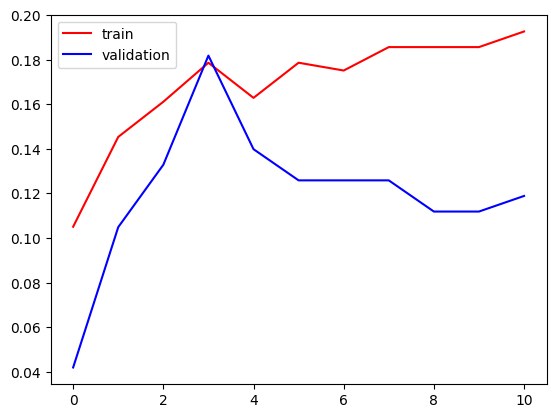

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/test/test/weapons2.jpg')

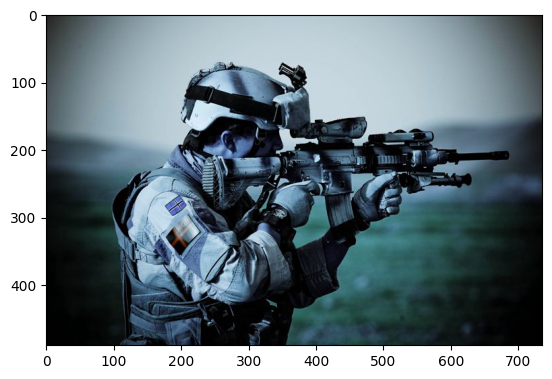

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(490, 736, 3)

In [ ]:
test_img=cv2.resize(test_img,dsize=(500,500))

In [ ]:
test_input=test_img.reshape((1,500,500,3))

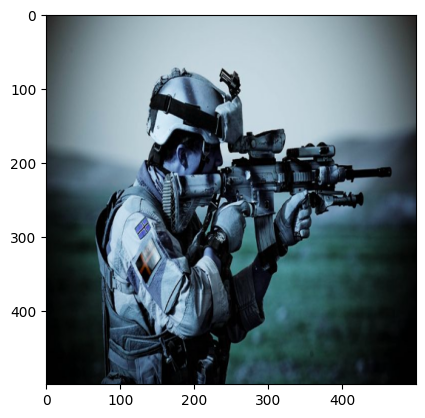

In [ ]:
plt.imshow(test_img)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 216ms/step


array([[0.11007684, 0.10564374, 0.11596347, 0.10620169, 0.10883912,
        0.1140018 , 0.11238103, 0.11268883, 0.11420343]], dtype=float32)

# **Yolov8**

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [4]:
from ultralytics import YOLO

In [5]:
model=YOLO()
model.train(data='data.yaml',epochs=100)

100%|██████████| 6.25M/6.25M [00:00<00:00, 111MB/s]


Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 25.0MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/weapon_detection/train/labels... 571 images, 0 backgrounds, 0 corrupt: 100%|██████████| 571/571 [00:01<00:00, 364.27it/s]


train: New cache created: /content/weapon_detection/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/weapon_detection/val/labels... 143 images, 0 backgrounds, 0 corrupt: 100%|██████████| 143/143 [00:00<00:00, 289.30it/s]

val: New cache created: /content/weapon_detection/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.63G      1.193      3.181      1.443         51        640: 100%|██████████| 36/36 [00:22<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        143        219      0.832      0.046       0.18      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.27G      1.101      2.107      1.359         48        640: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        143        219      0.832      0.203      0.195      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.28G      1.095      1.907      1.395         40        640: 100%|██████████| 36/36 [00:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        143        219      0.824      0.142      0.187       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.31G       1.15      1.814        1.4         39        640: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        143        219      0.815      0.185      0.223      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.29G      1.102      1.664      1.362         46        640: 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all        143        219      0.862      0.233      0.278      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.26G      1.092      1.593      1.355         47        640: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        143        219      0.838      0.292      0.302       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.26G      1.087      1.494      1.352         41        640: 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        143        219      0.865      0.253      0.335      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.28G      1.067      1.442      1.324         28        640: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        143        219      0.838      0.314       0.36      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.28G      1.034       1.41      1.304         35        640: 100%|██████████| 36/36 [00:18<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        143        219      0.856      0.322      0.365      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.28G       1.03      1.309       1.31         38        640: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        143        219      0.854      0.351       0.36      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.28G     0.9987      1.313      1.289         46        640: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        143        219       0.85      0.274      0.341      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.29G          1        1.3      1.303         47        640: 100%|██████████| 36/36 [00:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        143        219       0.89      0.294      0.364      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.29G      1.016      1.252      1.316         36        640: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]


                   all        143        219      0.907      0.356      0.397      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.29G      1.005      1.261      1.299         57        640: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        143        219      0.879      0.264      0.348      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.28G     0.9827      1.198      1.272         50        640: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]

                   all        143        219      0.875      0.331      0.385      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.28G     0.9484      1.109      1.238         27        640: 100%|██████████| 36/36 [00:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        143        219      0.835        0.4      0.397      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.28G     0.9621      1.113      1.232         47        640: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        143        219      0.865      0.337       0.37       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.26G     0.9319      1.106      1.224         40        640: 100%|██████████| 36/36 [00:16<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        143        219      0.734      0.405      0.433      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.29G      0.931      1.068      1.239         52        640: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        143        219      0.674      0.415        0.4       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.26G     0.9281      1.058      1.233         33        640: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        143        219      0.908      0.386      0.427      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.19G      0.945      1.039      1.244         39        640: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        143        219      0.655      0.381      0.395      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.29G     0.9099      1.028      1.219         34        640: 100%|██████████| 36/36 [00:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all        143        219      0.697      0.364      0.394      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.19G     0.9057     0.9995      1.208         38        640: 100%|██████████| 36/36 [00:15<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        143        219      0.828      0.371      0.396      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.29G     0.9105     0.9917      1.229         42        640: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        143        219      0.715        0.4      0.429      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.29G     0.8789     0.9525      1.199         52        640: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        143        219      0.785      0.385      0.474      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.29G     0.8741     0.9564        1.2         21        640: 100%|██████████| 36/36 [00:18<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]

                   all        143        219      0.772      0.398      0.447      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.29G      0.865     0.8996        1.2         46        640: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all        143        219      0.744      0.396      0.452       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.28G     0.8706     0.9033      1.181         45        640: 100%|██████████| 36/36 [00:16<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

                   all        143        219      0.715      0.395      0.451      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.31G     0.8598     0.9047      1.187         46        640: 100%|██████████| 36/36 [00:16<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]


                   all        143        219      0.774      0.431      0.475      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.29G      0.821     0.8787      1.161         41        640: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]

                   all        143        219      0.717      0.428      0.455      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.28G     0.8288     0.8566      1.167         39        640: 100%|██████████| 36/36 [00:18<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        143        219      0.741       0.41      0.449      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.29G     0.8474     0.8936      1.182         42        640: 100%|██████████| 36/36 [00:16<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        143        219      0.745      0.418      0.443      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.28G     0.8183     0.8417      1.164         38        640: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        143        219      0.787      0.417      0.504      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.28G     0.8318     0.8262      1.157         45        640: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]

                   all        143        219      0.724      0.431      0.457      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.28G     0.8363      0.852      1.169         40        640: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        143        219      0.789      0.386      0.456       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.29G        0.8     0.8115      1.156         50        640: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]


                   all        143        219      0.784       0.44      0.494      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.28G     0.7982      0.811      1.134         28        640: 100%|██████████| 36/36 [00:16<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        143        219      0.774      0.435      0.476      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.29G     0.8021     0.7797      1.145         46        640: 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        143        219      0.779       0.42      0.476      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.29G     0.7702     0.7555      1.127         47        640: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]


                   all        143        219      0.771      0.421      0.454      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.26G     0.7984      0.798      1.154         43        640: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]


                   all        143        219      0.799      0.406      0.498      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.26G       0.77     0.7697      1.138         44        640: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]

                   all        143        219      0.751      0.424      0.469      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.28G     0.7792     0.7538      1.131         41        640: 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        143        219      0.779      0.401      0.467      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.29G     0.7761     0.7537      1.122         41        640: 100%|██████████| 36/36 [00:15<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        143        219       0.77      0.409      0.492      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.28G     0.7872     0.7639      1.143         42        640: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        143        219      0.774      0.406      0.494      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.28G     0.7651     0.7108      1.115         47        640: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        143        219      0.776      0.432      0.482      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.31G     0.7591     0.7292      1.123         39        640: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        143        219       0.78      0.428      0.514      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.28G     0.7641     0.7254      1.125         44        640: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        143        219      0.781      0.439      0.491      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.26G      0.772     0.7129      1.125         47        640: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        143        219      0.761      0.429      0.507      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.29G     0.7746     0.7285      1.125         57        640: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        143        219      0.772      0.421      0.493      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.26G     0.7262     0.6947      1.108         51        640: 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

                   all        143        219      0.786      0.426      0.483      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.28G     0.7425     0.7016       1.11         47        640: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]

                   all        143        219      0.774      0.428      0.495      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.28G     0.7426     0.6924       1.12         52        640: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.18it/s]

                   all        143        219      0.787      0.423      0.513      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.28G     0.7469     0.7096      1.134         37        640: 100%|██████████| 36/36 [00:16<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all        143        219      0.768      0.422      0.486      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.29G     0.7276     0.6765      1.104         45        640: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        143        219      0.771      0.434      0.474      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.29G     0.7238     0.6674      1.108         44        640: 100%|██████████| 36/36 [00:18<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

                   all        143        219      0.778      0.433      0.483      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.29G     0.7199     0.6599      1.098         47        640: 100%|██████████| 36/36 [00:18<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]

                   all        143        219      0.807      0.425      0.486      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.28G     0.7186     0.6679      1.099         49        640: 100%|██████████| 36/36 [00:16<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]

                   all        143        219      0.796      0.431      0.484       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.29G     0.7264     0.6582      1.103         30        640: 100%|██████████| 36/36 [00:16<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        143        219      0.757      0.428      0.494      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.28G     0.6756     0.6137      1.073         42        640: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]

                   all        143        219      0.414      0.502      0.497      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.31G     0.6961     0.6226      1.077         39        640: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]


                   all        143        219      0.561      0.528      0.515      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.28G     0.6794     0.6168      1.084         35        640: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]


                   all        143        219      0.419      0.523      0.498      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.26G     0.7025     0.6264       1.07         44        640: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.98it/s]

                   all        143        219      0.781       0.45       0.52      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.31G     0.7105     0.6498      1.088         47        640: 100%|██████████| 36/36 [00:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        143        219      0.789      0.435      0.535       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.28G     0.6848     0.6285      1.087         70        640: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        143        219      0.784      0.435      0.489      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.29G      0.678     0.5945      1.075         39        640: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        143        219      0.443      0.523      0.501      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.29G     0.6873      0.613      1.067         41        640: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        143        219      0.588       0.49      0.516      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.31G     0.6679     0.5735      1.063         38        640: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

                   all        143        219      0.487      0.516      0.503      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.29G     0.6756     0.6034      1.067         55        640: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        143        219      0.457      0.543      0.499      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.28G     0.6623     0.6147      1.075         37        640: 100%|██████████| 36/36 [00:18<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        143        219      0.482      0.534      0.529      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.26G     0.6548      0.554      1.059         51        640: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        143        219      0.505      0.531      0.517      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.28G     0.6411     0.5573      1.041         46        640: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]


                   all        143        219      0.535      0.548      0.531      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.28G     0.6435     0.5762      1.059         41        640: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        143        219      0.463      0.524      0.529      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.28G     0.6297     0.5604      1.044         52        640: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        143        219      0.432      0.554      0.529      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.29G     0.6512     0.5611      1.063         46        640: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        143        219      0.438      0.545      0.519      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.26G     0.6577     0.5623      1.061         40        640: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]

                   all        143        219      0.428      0.554      0.504      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.31G     0.6631     0.5826      1.065         35        640: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]


                   all        143        219      0.414      0.525      0.511      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.26G     0.6298     0.5395      1.046         52        640: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        143        219      0.448      0.535      0.514      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.28G     0.6298     0.5429      1.045         63        640: 100%|██████████| 36/36 [00:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        143        219      0.655      0.478      0.516      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.28G      0.628     0.5328      1.049         47        640: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        143        219       0.52       0.55      0.529      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.26G     0.6495     0.5565      1.064         42        640: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        143        219      0.648       0.51      0.521      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.28G     0.6293     0.5313      1.055         35        640: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all        143        219      0.647      0.512      0.522      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.29G     0.6365     0.5448      1.051         31        640: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        143        219      0.681      0.517       0.54      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.28G     0.6244     0.5335      1.039         46        640: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]

                   all        143        219      0.663      0.504      0.534      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.29G     0.6137     0.5245      1.054         44        640: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        143        219      0.666      0.487      0.517      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.28G     0.6253     0.5377      1.046         40        640: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        143        219      0.664      0.513      0.526      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.28G      0.602     0.5178      1.043         44        640: 100%|██████████| 36/36 [00:18<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        143        219      0.681      0.518      0.533       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.28G     0.6061     0.5188      1.041         35        640: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

                   all        143        219       0.49       0.56      0.522      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.29G     0.6073     0.5201      1.031         39        640: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        143        219      0.657      0.507        0.5      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.29G      0.593     0.5113      1.023         39        640: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        143        219      0.652      0.508      0.507      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.29G     0.5847     0.4942      1.026         47        640: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        143        219      0.481      0.512       0.51      0.431


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.26G     0.4762      0.412     0.9713         26        640: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.93it/s]

                   all        143        219      0.709      0.506      0.525      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.26G     0.4612     0.3902     0.9721         17        640: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        143        219       0.87      0.503      0.517      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.28G      0.454     0.3832       0.97         17        640: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        143        219      0.659      0.552      0.524      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.26G      0.448     0.3627      0.958         25        640: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        143        219      0.523      0.546      0.531      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.26G     0.4531     0.3693     0.9786         11        640: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        143        219      0.475      0.554      0.524       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.28G     0.4393     0.3609     0.9645         21        640: 100%|██████████| 36/36 [00:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]

                   all        143        219      0.694      0.552      0.533      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.26G     0.4436     0.3558     0.9448         26        640: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]


                   all        143        219       0.69      0.549      0.555      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.28G     0.4297     0.3536     0.9481         16        640: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        143        219      0.508      0.552      0.528      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.28G     0.4257     0.3529     0.9512         38        640: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        143        219      0.498      0.551      0.528      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.29G     0.4258     0.3493     0.9559         13        640: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        143        219      0.675      0.552      0.529      0.449



100 epochs completed in 0.608 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]


                   all        143        219      0.692      0.549      0.555      0.473
       Automatic Rifle        106        162      0.833       0.92      0.901      0.729
               Bazooka          4          6      0.269      0.333      0.287      0.254
      Grenade Launcher         19         24      0.873      0.792      0.914      0.787
               Handgun          2          2          1          0          0          0
                 Knife          3          4      0.294       0.25       0.25       0.25
                   SMG         17         21      0.881          1      0.978      0.819
Speed: 0.5ms preprocess, 4.3ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bbedf0075e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [6]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [7]:
!yolo task=detect mode=val model='//content//runs//detect//train//weights//best.pt' data=data.yaml

Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/weapon_detection/val/labels.cache... 143 images, 0 backgrounds, 0 corrupt: 100% 143/143 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:05<00:00,  1.69it/s]
                   all        143        219      0.697      0.551      0.554      0.474
       Automatic Rifle        106        162      0.835      0.932      0.899      0.725
               Bazooka          4          6      0.269      0.333      0.286      0.253
      Grenade Launcher         19         24      0.906      0.792      0.914      0.788
               Handgun          2          2          1          0          0          0
                 Knife          3          4      0.292       0.25       0.25       0.25
                   SMG         17         21  

In [8]:
!yolo task=detect mode=predict model='//content//runs//detect//train//weights//best.pt' source='/content/test/test'

Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs

image 1/8 /content/test/test/army.jpg: 448x640 (no detections), 94.8ms
image 2/8 /content/test/test/terrorists.jpg: 384x640 1 Automatic Rifle, 64.3ms
image 3/8 /content/test/test/terrorists2.jpg: 384x640 1 Grenade Launcher, 7.5ms
image 4/8 /content/test/test/weapons.jpg: 448x640 2 Automatic Rifles, 6.8ms
image 5/8 /content/test/test/weapons2.jpg: 448x640 1 Automatic Rifle, 6.6ms
video 6/8 (frame 1/12) /content/test/test/giphy.gif: 480x640 (no detections), 64.6ms
video 6/8 (frame 2/12) /content/test/test/giphy.gif: 480x640 (no detections), 6.0ms
video 6/8 (frame 3/12) /content/test/test/giphy.gif: 480x640 1 Automatic Rifle, 12.3ms
video 6/8 (frame 4/12) /content/test/test/giphy.gif: 480x640 (no detections), 11.5ms
video 6/8 (frame 5/12) /content/test/test/giphy.gif: 480x640 (no detections), 10.0ms
video 6/8 (frame 6/12) 